# Figures

In [2]:
import os
import sys

import altair as alt
import pandas as pd
import yaml

os.sys.path.append(os.path.dirname(os.path.abspath('../utils')))

from utils.plotting import get_chromtracks, chromtrack, plot_ctype

alt.data_transformers.enable('json')

%reload_ext watermark
%watermark -d -v -m -p altair,pandas,yaml

2019-07-12 

CPython 3.6.8
IPython 7.2.0

altair 2.3.0
pandas 0.24.0
yaml 3.13

compiler   : GCC 7.3.0
system     : Linux
release    : 5.1.16-300.fc30.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


## Plot of chromosome tracks as stacked barplots

In [3]:
url_config = "../../data/results/config.yaml"
url_ctype_density = "../../data/results/density50kb_{cty}-lb20ub80_{ctx}_Col-0_wt_{src}.bedg"
url_ctype_count = "../../data/results/count-ctype_genome.csv"

with open(url_config, "r") as cfile:
    config = yaml.load(cfile)

source = config["data"]["source"]#config["params"]["plot_chromtrack"]["source"]
encoding = config["params"]["plot_chromtrack"]["encoding"]
colormap = config["params"]["colormap"]["cytotype"]

In [125]:
ctypechart = alt.vconcat(spacing=20)
chromchart = alt.vconcat(spacing=10)

for src in source:
    ctypechart &= plot_ctype(url_ctype_count, encoding, colormap, src).properties(width=300, height=200)
    
track = alt.vconcat(spacing=10)

for chrom in "1":
    for src in source:
        title = "{}".format(src.replace("-", " "))
        track &= chromtrack(url_ctype_density, encoding, colormap, src, chrom).properties(width=800, height=40, title=title)

# for src in source:
#     track = alt.vconcat(spacing=-15, title=src)
#     for chrom in "12345":
#         track &= chromtrack(url_ctype_density, encoding, colormap, src, chrom).properties(width=900, height=40, title=chrom)
#     chromchart &= track.resolve_scale(x="shared")
    
# for chrom in "12345":
#     chromtracks = alt.vconcat(spacing=-15, title="Chr" + chrom)
#     for src in source:
#         chromtracks &= chromtrack(url_ctype_density, encoding, colormap, src, chrom).properties(width=900, height=40)
#     chromchart &= chromtracks

# chart = (ctypechart | chromchart).configure_view(strokeOpacity=0).resolve_scale(color='independent')

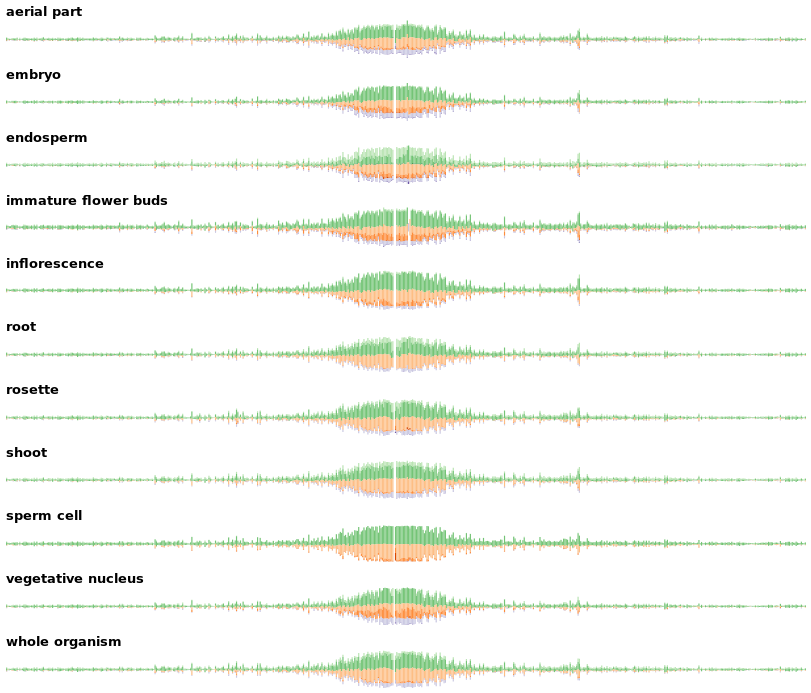

In [126]:
track.configure_title(anchor="start", orient="top", offset=-1).configure_view(strokeOpacity=0).resolve_scale(x="shared")

In [120]:
track.save("../../data/results/fig/plot-ctype_genome.json")

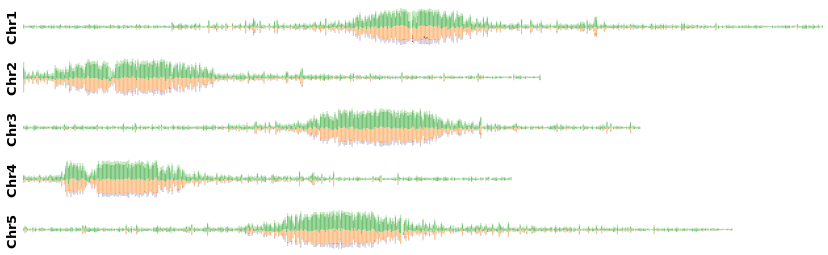

In [9]:
track = alt.vconcat(spacing=10)
for chrom in "12345":
    title = "Chr{}".format(chrom)
    track &= chromtrack(url_ctype_density, encoding, colormap, "rosette", chrom).properties(width=800, height=40, title=title)
    
track.configure_title(anchor="start", orient="left").configure_view(strokeOpacity=0).resolve_scale(x="shared")

## Plot genes with highest proportion of metastable Cs (MSCs)

In [9]:
data = pd.read_csv(
    "../../data/results/top-msc_gene_protein-coding_Col-0_wt.bed",
    header=0,
    sep="\t"
)

In [10]:
chrom = "chrom == '2'"

domain_max = round(max(data.query(chrom).start)/1e6) * 1e6

base = alt.Chart(
    (data
     .query(chrom)
     #.query("context == 'CHH'")
     .query("source != 'embryo'")
     .query("source != 'endosperm'")
     .query("source != 'immature flower buds'")
     .query("source != 'whole organism'")
     .query("source != 'shoot'")
     .query("source != 'aerial part'")
    )
)

points = base.mark_point().encode(
    x=alt.X("start:Q", axis=alt.Axis(title="position"), scale=alt.Scale(domain=(0, domain_max))),
    y=alt.Y("MSC:Q", axis=alt.Axis(offset=10, format='%', title="MSC")),
    color=alt.Color("top1pct", legend=None),
    tooltip="name:N"
).properties(
    width=400,
    height=100
).facet(
    row="source:N",
    column="context:N"
).configure_view(
    strokeOpacity=0
).configure_axis(
    grid=False
).resolve_scale(
    y="independent"
)

/home/oender/anaconda3/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


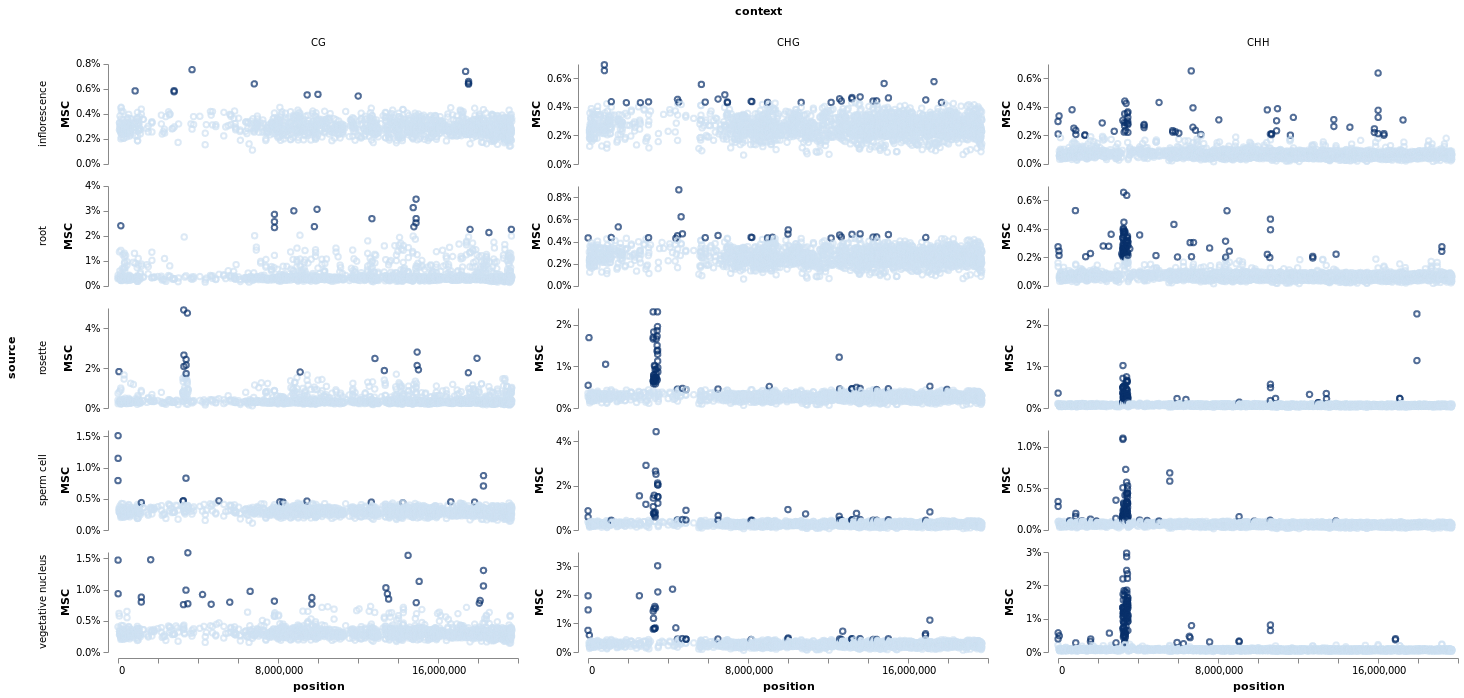

In [11]:
points

## JSD median values sorted

In [106]:
stats = pd.read_csv("../../data/results/stats_Col-0_wt_rosette.csv", header=0)
stats["dummy"] = "Chr" + stats["#chrom"].astype(str) + " (" + stats["context"] + ")"

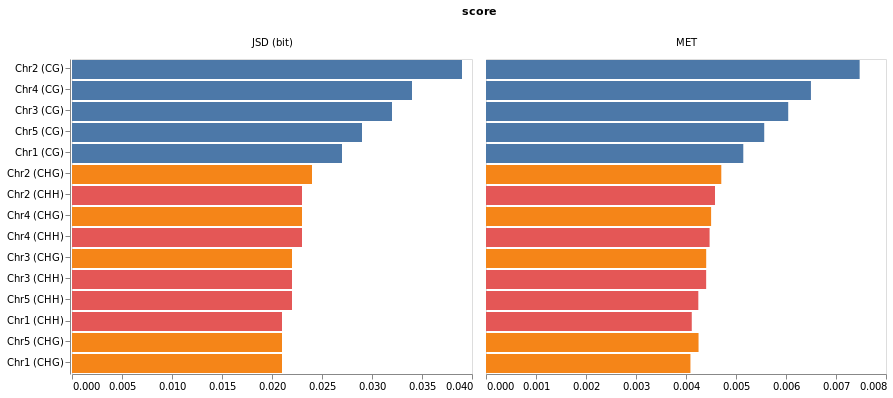

In [114]:
d = stats[stats["statistic"] == "50%"].sort_values("value", ascending=False)

alt.Chart(d).mark_bar().encode(
    x=alt.X(
        "value:Q",
        title=None,
        axis=alt.Axis(grid=False)
    ),
    y=alt.Y(
        'dummy:N',
        title=None,
        sort=alt.EncodingSortField(
            field="value:Q",
            order="ascending",
            op="sum"
        )
    ),
    color=alt.Color(
        "context:N",
        legend=None
    )
).facet(
    column="score:N"
).resolve_scale(
    x="independent"
)


In [44]:
pd.unique(stats.statistic)

array(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
      dtype=object)

0      1.359223e+06
1      1.508290e+06
2      7.701542e+06
3      9.051390e+05
4      9.789120e+05
5      5.117077e+06
6      1.108236e+06
7      1.215569e+06
8      6.126080e+06
9      8.730660e+05
10     9.516420e+05
11     4.859631e+06
12     1.241239e+06
13     1.360034e+06
14     6.950991e+06
15     7.290492e-02
16     3.892078e-02
17     3.500356e-02
18     8.148207e-02
19     5.067535e-02
20     3.985394e-02
21     7.679590e-02
22     4.498973e-02
23     3.830230e-02
24     7.878593e-02
25     4.679862e-02
26     3.892119e-02
27     7.616915e-02
28     4.219855e-02
29     3.606420e-02
           ...     
210    5.177131e-01
211    6.839945e-03
212    6.808511e-03
213    8.291741e-01
214    4.670544e-02
215    9.728415e-03
216    8.000000e-01
217    9.900990e-03
218    8.337676e-03
219    8.166667e-01
220    1.199657e-02
221    8.800000e-03
222    7.532777e-01
223    7.920792e-03
224    7.401316e-03
225    1.000000e+00
226    1.000000e+00
227    9.655172e-01
228    1.000000e+00


In [76]:
source

site           variety  year     yield
0    University Farm         Manchuria  1931  27.00000
1             Waseca         Manchuria  1931  48.86667
2             Morris         Manchuria  1931  27.43334
3          Crookston         Manchuria  1931  39.93333
4       Grand Rapids         Manchuria  1931  32.96667
5             Duluth         Manchuria  1931  28.96667
6    University Farm           Glabron  1931  43.06666
7             Waseca           Glabron  1931  55.20000
8             Morris           Glabron  1931  28.76667
9          Crookston           Glabron  1931  38.13333
10      Grand Rapids           Glabron  1931  29.13333
11            Duluth           Glabron  1931  29.66667
12   University Farm          Svansota  1931  35.13333
13            Waseca          Svansota  1931  47.33333
14            Morris          Svansota  1931  25.76667
15         Crookston          Svansota  1931  40.46667
16      Grand Rapids          Svansota  1931  29.66667
17            Duluth          Svansota  1931  25.70000
18   University Farm            Velvet  1931  39.90000
19            Waseca            Velvet  1931  50.23333
20            Morris            Velvet  1931  26.13333
21         Crookston            Velvet  1931  41.33333
22      Grand Rapids            Velvet  1931  23.03333
23            Duluth            Velvet  1931  26.30000
24   University Farm             Trebi  1931  36.56666
25            Waseca             Trebi  1931  63.83330
26            Morris             Trebi  1931  43.76667
27         Crookston             Trebi  1931  46.93333
28      Grand Rapids             Trebi  1931  29.76667
29            Duluth             Trebi  1931  33.93333
..               ...               ...   ...       ...
90   University Farm           No. 457  1932  26.43334
91            Waseca           No. 457  1932  42.20000
92            Morris           No. 457  1932  43.53334
93         Crookston           No. 457  1932  34.33333
94      Grand Rapids           No. 457  1932  19.46667
95            Duluth           No. 457  1932  22.70000
96   University Farm           No. 462  1932  25.56667
97            Waseca           No. 462  1932  44.70000
98            Morris           No. 462  1932  47.00000
99         Crookston           No. 462  1932  30.53333
100     Grand Rapids           No. 462  1932  19.90000
101           Duluth           No. 462  1932  22.50000
102  University Farm          Peatland  1932  28.06667
103           Waseca          Peatland  1932  36.03333
104           Morris          Peatland  1932  43.20000
105        Crookston          Peatland  1932  25.23333
106     Grand Rapids          Peatland  1932  26.76667
107           Duluth          Peatland  1932  31.36667
108  University Farm           No. 475  1932  30.00000
109           Waseca           No. 475  1932  41.26667
110           Morris           No. 475  1932  44.23333
111        Crookston           No. 475  1932  32.13333
112     Grand Rapids           No. 475  1932  15.23333
113           Duluth           No. 475  1932  27.36667
114  University Farm  Wisconsin No. 38  1932  38.00000
115           Waseca  Wisconsin No. 38  1932  58.16667
116           Morris  Wisconsin No. 38  1932  47.16667
117        Crookston  Wisconsin No. 38  1932  35.90000
118     Grand Rapids  Wisconsin No. 38  1932  20.66667
119           Duluth  Wisconsin No. 38  1932  29.33333

[120 rows x 4 columns]